# Analiza podatkov

Avtorica: Neža Zupančič

Vsi podatki, ki so bili uporabljeni v projektni nalogi, so bili zbrani iz spletne strani: [Basketball reference](https://www.basketball-reference.com/)

Gre za statistične podatke igralcev lige NBA za zadnjih 25 let. Ta statistika predstavlja sezonska povprečja. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

tabela_podatkov = pd.read_csv("pridobivanje_podatkov/podatki.csv")

tabela_podatkov = tabela_podatkov.rename(columns={
    "Player": "Igralec",
    "Team": "Ekipa",
    "Age": "Starost",
    "Awards": "Nagrada",
    "Year": "Leto",
    "Pos": "Poz"
}) 

## 1. Tabela podatkov

Za začetek si oglejmo tabelo podatkov.


In [3]:
tabela_podatkov

,Rk,Igralec,Starost,Ekipa,Poz,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Nagrada,Leto
0,1,Shaquille O'Neal,27,LAL,C,79,79,40.0,12.1,21.1,...,9.4,13.6,3.8,0.5,3.0,2.8,3.2,29.7,"MVP-1,DPOY-2,AS,NBA1,DEF2",2000
1,2,Allen Iverson,24,PHI,SG,70,70,40.8,10.4,24.8,...,2.8,3.8,4.7,2.1,0.1,3.3,2.3,28.4,"MVP-7,AS,NBA2",2000
2,3,Grant Hill,27,DET,SF,74,74,37.5,9.4,19.2,...,5.3,6.6,5.2,1.4,0.6,3.2,2.6,25.8,"MVP-8,AS,NBA2",2000
3,4,Vince Carter,23,TOR,SF,82,82,38.1,9.6,20.7,...,4.0,5.8,3.9,1.3,1.1,2.2,3.2,25.7,"MVP-10,AS,NBA3",2000
4,5,Karl Malone,36,UTA,PF,82,82,35.9,9.2,18.0,...,7.4,9.5,3.7,1.0,0.9,2.8,2.8,25.5,"MVP-4,AS,NBA2",2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15153,568,Danny Green,36,PHI,SG,2,0,9.0,0.0,1.0,...,1.0,1.0,0.5,0.5,0.0,0.0,0.5,0.0,NaN,2024
15154,569,Ron Harper Jr.,23,TOR,PF,1,0,4.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,NaN,2024
15155,570,Justin Jackson,28,MIN,SF,2,0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024
15156,571,Dmytro Skapintsev,25,NYK,C,2,0,1.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2024


## 2. Povprečno število točk igralcev

### 2.1. Najboljših 10

Najprej me zanima povprečje doseženih točk najboljših 10 igralcev v vsakih sezoni.

In [4]:
top10_igralcev = (
    tabela_podatkov.groupby("Leto", group_keys=False)[["Leto", "Igralec", "PTS"]].apply(
        lambda x: x.nlargest(10, "PTS")
    )
)

top10_igralcev.to_csv("top10.csv", index=False)

print(top10_igralcev)

       Leto           Igralec   PTS
0      2000  Shaquille O'Neal  29.7
1      2000     Allen Iverson  28.4
2      2000        Grant Hill  25.8
3      2000      Vince Carter  25.7
4      2000       Karl Malone  25.5
...     ...               ...   ...
14428  2024      Devin Booker  27.1
14429  2024      Kevin Durant  27.1
14430  2024      Jayson Tatum  26.9
14431  2024      De'Aaron Fox  26.6
14432  2024  Donovan Mitchell  26.6

[250 rows x 3 columns]


In [5]:
povprečje_top10 = (
    top10_igralcev
    .groupby("Leto")["PTS"]
    .mean()
)
povprečje_top10

Leto
2000    25.35
2001    27.37
2002    25.74
2003    26.20
2004    24.05
2005    26.54
2006    28.67
2007    27.94
2008    25.28
2009    25.57
2010    26.33
2011    25.67
2012    24.27
2013    24.77
2014    25.47
2015    24.84
2016    25.90
2017    27.86
2018    26.81
2019    27.91
2020    29.10
2021    28.46
2022    28.73
2023    30.74
2024    29.21
Name: PTS, dtype: float64

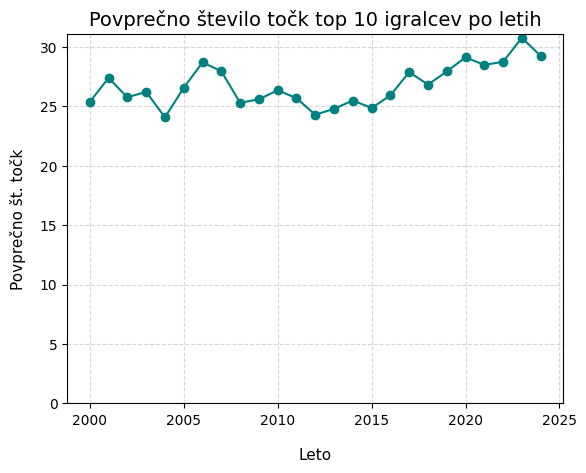

In [6]:
povprečje_top10.plot(x="Leto", y="mean", kind="line", color="teal", marker="o")
plt.ylim(0)
plt.title("Povprečno število točk top 10 igralcev po letih", fontsize=14)
plt.xlabel("Leto", fontsize=11, labelpad=15)
plt.ylabel("Povprečno št. točk", fontsize=11, labelpad=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### 2.2. Povprečje vseh igralcev v vsakem letu

Zanimalo me je tudi povprečje vseh igralcev v vsakem letu in če se dinamika tega kaj povezuje in razlikuje od povprečja najboljših 10 igralcev.

In [7]:
povprečje = tabela_podatkov.groupby("Leto")["PTS"].mean()
najboljše_leto = povprečje.idxmax()
najslabše_leto = povprečje.idxmin()

print(f"Najboljše leto: {najboljše_leto}")
print(f"Najslabše leto: {najslabše_leto}")

Najboljše leto: 2023
Najslabše leto: 2004


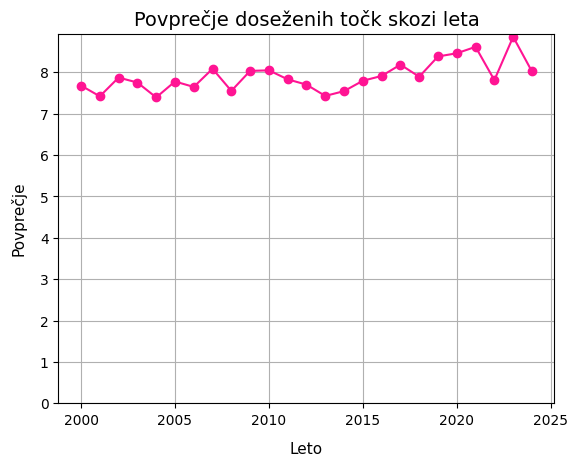

In [8]:
povprečje.plot(x="Leto", y="mean", kind="line", legend=False, marker="o", color="deeppink")
plt.ylim(0)
plt.title("Povprečje doseženih točk skozi leta", fontsize=14)
plt.xlabel("Leto",fontsize=11, labelpad=10)
plt.ylabel("Povprečje",fontsize=11, labelpad=10)
plt.grid()
plt.show()

## Ugotovitve

Prvi graf predstavlja 10 najboljših strelcev vsake sezone. Povprečje se giblje med 24 in 33 točk ter se je v 25-ih letih nekoliko povečalo. Najnižje povprečje je bilo leta 2004, najvišje pa 2023.
V drugem grafu pa si lahko pogledamo povprečje doseženih točk vseh igralcev vsake sezone. Tu je povprečje bistveno nižje kot pri prvem grafu, saj se giblje med 7.4 in 8.9 točkami.
Tu lahko opazimo bistveno večje nihanje v zadnjih petih letih kot pri prvem grafu. Povprečje top 10 strelcev je leta 2021 in 2022 skoraj enako, medtem ko je povprečje vseh igralcev strmo padlo in leta 2023 strmo naraslo.
Ugotovila sem, da ti dve povprečji ne nihata vedno sorazmerno, torej ne vplivata druga na drugo v takšnem pomeni kot sem mislila.

## 3. Povprečna starost najbolših 10 igralcev

Zanima me povprečna starost top 10 igralcev v vsakem letu in če se ta kaj zmanjšuje.

In [9]:
top10_točke = (
    tabela_podatkov.groupby("Leto", group_keys=False)[["Leto", "Starost", "PTS"]].apply(
        lambda x: x.nlargest(10,"PTS")
    )
)

In [28]:
povprečna_starost_top10 = (
    top10_točke.groupby("Leto")["Starost"].mean()
)

print(povprečna_starost_top10)
najstarejši = povprečna_starost_top10.idxmax()
najmlajši = povprečna_starost_top10.idxmin()

print(f"Najnižja povprečna starost igralcev nastopi v letu {najmlajši}.")
print(f"Najvišja povprečna starost igralcev nastopi v letu {najstarejši}.")


Leto
2000    26.5
2001    24.3
2002    25.4
2003    26.1
2004    26.2
2005    25.2
2006    25.8
2007    27.2
2008    26.6
2009    25.2
2010    26.3
2011    26.2
2012    26.1
2013    26.3
2014    25.6
2015    27.3
2016    26.1
2017    26.7
2018    27.0
2019    27.3
2020    26.0
2021    26.7
2022    27.8
2023    29.9
2024    27.4
Name: Starost, dtype: float64
Najnižja povprečna starost igralcev nastopi v letu 2001.
Najvišja povprečna starost igralcev nastopi v letu 2023.


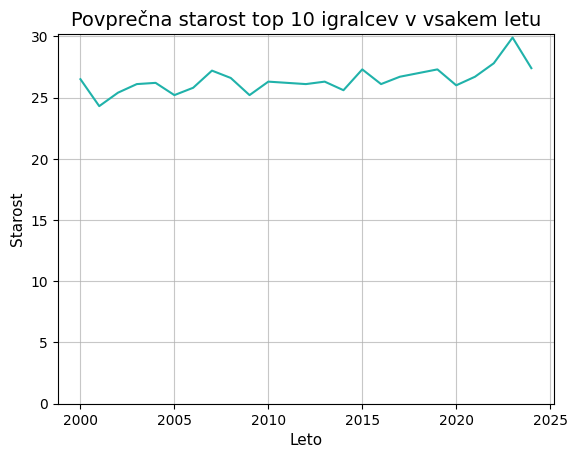

In [11]:
povprečna_starost_top10.plot(x="Leto", y="mean", kind="line", color="lightseagreen")
plt.title("Povprečna starost top 10 igralcev v vsakem letu", fontsize=14)
plt.xlabel("Leto", fontsize=11)
plt.ylabel("Starost", fontsize=11)
plt.ylim(0)
plt.grid(True, alpha=0.7)
plt.show()

### Ugotovitve 



## 4. Učinkovitost igralcev

### 4. 1. Delež doseženih točk

Zanimalo me je kako je top 10 igralcev vsako leto učinkovito na minuto svoje igre. Torej koliko točk v povprečju dosežejo vsako minuto.

In [12]:
tabela_podatkov["točke_na_minuto"] = tabela_podatkov["PTS"] / tabela_podatkov["MP"]

top10_igralcev = (
    tabela_podatkov.groupby("Leto", group_keys=False)[["Leto", "PTS", "točke_na_minuto"]].apply(
        lambda x: x.nlargest(10, "PTS")
    )
)

In [13]:
povprečna_učinkovitost = (
    top10_igralcev.groupby("Leto")["točke_na_minuto"]
    .mean()
    .reset_index(name="Povprečna učinkovitost na minuto")
)

povprečna_učinkovitost

,Leto,Povprečna učinkovitost na minuto
0,2000,0.651188
1,2001,0.683075
2,2002,0.653616
3,2003,0.656107
4,2004,0.613858
5,2005,0.665929
6,2006,0.716888
7,2007,0.699638
8,2008,0.668663
9,2009,0.685299


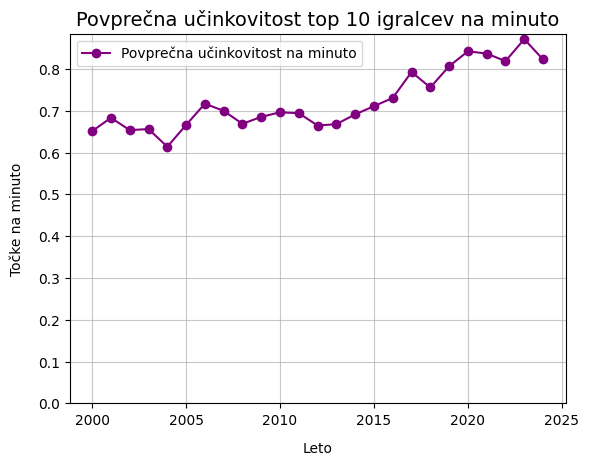

In [14]:
povprečna_učinkovitost.plot(x="Leto", y="Povprečna učinkovitost na minuto", kind="line", marker="o", color="purple")
plt.title("Povprečna učinkovitost top 10 igralcev na minuto", fontsize=14)
plt.xlabel("Leto", labelpad=10)
plt.ylabel("Točke na minuto", labelpad=10)
plt.ylim(0)
plt.grid(True, alpha=0.7)
plt.show()


### 4. 2. Najbolj učinkovit igralec

Zanimalo me je tudi kateri igralec je najboljši učinkovit pri doseganju točk v vseh 25 letih. 
Pri izračunu sem si pomagala s prejšnjo kodo povprečna učinkovitost na minuto. 

In [15]:
top10_najboljših = (
    tabela_podatkov.sort_values(by="točke_na_minuto", ascending=False)
        .drop_duplicates(subset="Igralec")   #vzamem samo najboljšo sezono vsakega igralca
        .reset_index()
        .head(10)[["Igralec", "točke_na_minuto", "MP", "PTS"]]
)

top10_najboljših = top10_najboljših.rename(columns={
    "MP": "Odigrane minute",
    "PTS": "Dosežene točke"
})

top10_najboljših

,Igralec,točke_na_minuto,Odigrane minute,Dosežene točke
0,Naz Mitrou-Long,3.000000,1.0,3.0
1,Zhou Qi,2.000000,1.0,2.0
2,DeAndre Liggins,2.000000,1.0,2.0
3,Ahmad Caver,2.000000,1.0,2.0
4,Jackie Butler,1.941176,1.7,3.3
5,Gerald Green,1.500000,4.0,6.0
6,Jimmer Fredette,1.400000,2.5,3.5
7,Izaiah Brockington,1.333333,3.0,4.0
8,Udonis Haslem,1.333333,3.0,4.0
9,Marcus Williams,1.333333,1.5,2.0


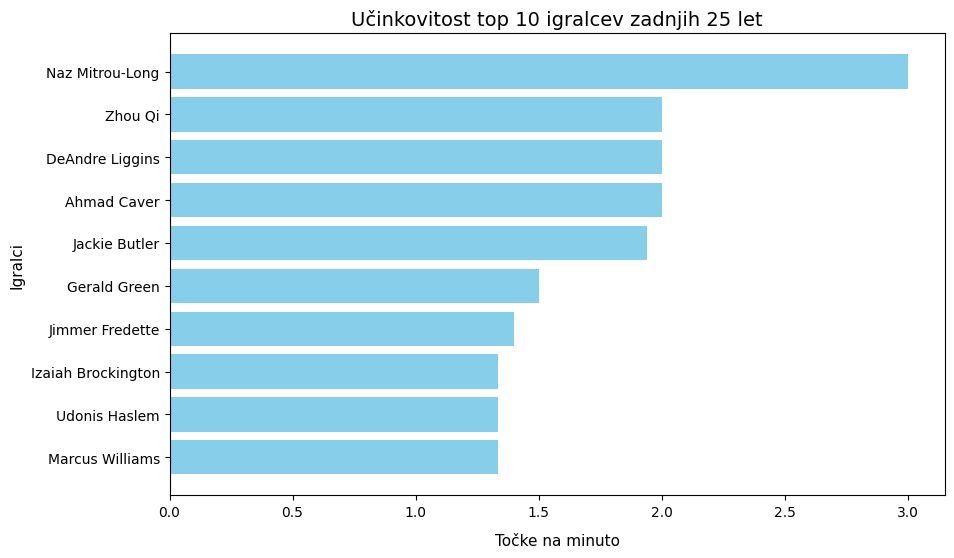

In [16]:
top10_najboljših = top10_najboljših[["Igralec", "točke_na_minuto"]]
# top10_najboljših["točke_na_minuto"] = pd.to_numeric(top10_najboljših["točke_na_minuto"], errors="coerce")

plt.figure(figsize=(10, 6))
bars = plt.barh(top10_najboljših["Igralec"], top10_najboljših["točke_na_minuto"], color="skyblue")
# top10_najboljših.plot(x="točke_na_minuto", y="Igralec", kind="bar", color="lightblue")
# top10_najboljših.dtypes
plt.title("Učinkovitost top 10 igralcev zadnjih 25 let", fontsize=14)
plt.gca().invert_yaxis()   # urejenost od največje vrednosti do najmanjše
plt.xlabel("Točke na minuto", fontsize=11, labelpad=10)
plt.ylabel("Igralci", fontsize=11)
plt.show()

## 5. Top 10 igralcev v vseh sezonah

### 5.1. Dosežene točke

C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_2824\3103728944.py:13: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_2824\3103728944.py:13: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Uporabnik\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


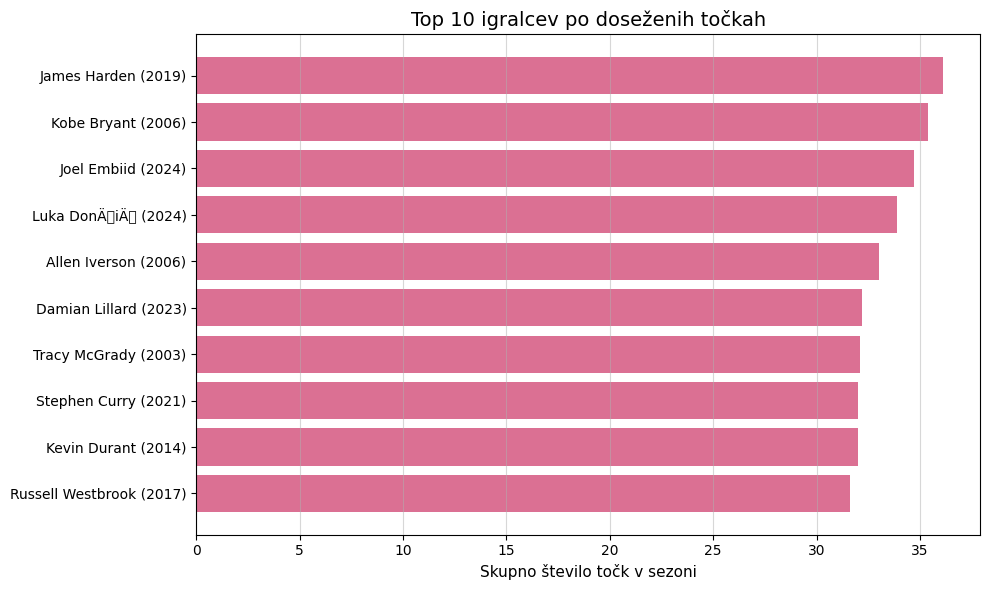

Največje število točk:
Naziv    James Harden (2019)
PTS                     36.1
Name: 0, dtype: object.
Najmanjše število točk:
Naziv    Russell Westbrook (2017)
PTS                          31.6
Name: 12, dtype: object.


In [33]:
top10_pts = tabela_podatkov.sort_values(by="PTS", ascending=False)
top10_pts = top10_pts.reset_index()
top10_pts = top10_pts.drop_duplicates(subset=["Igralec"]).head(10)
top10_pts["Naziv"]  = top10_pts["Igralec"] + " (" + top10_pts["Leto"].astype(str) + ")"

plt.figure(figsize=(10, 6))
bars = plt.barh(top10_pts["Naziv"], top10_pts["PTS"], color="palevioletred")
plt.title("Top 10 igralcev po doseženih točkah", fontsize=14)
plt.xlabel("Skupno število točk v sezoni", fontsize=11)
plt.gca().invert_yaxis()   #največje naj bo na vrhu
plt.grid(axis="x", alpha=0.5)
    
plt.tight_layout()
plt.show()

top10_pts = top10_pts[["Naziv", "PTS"]]
največ_točk = top10_pts.iloc[0]
najmanj_točk = top10_pts.iloc[-1]

print(f"Največje število točk:\n{največ_točk}.")
print(f"Najmanjše število točk:\n{najmanj_točk}.")



### 5.2. Ekipe

Zanimalo me je tudi katera ekipa ima največ igralcev med top 10.

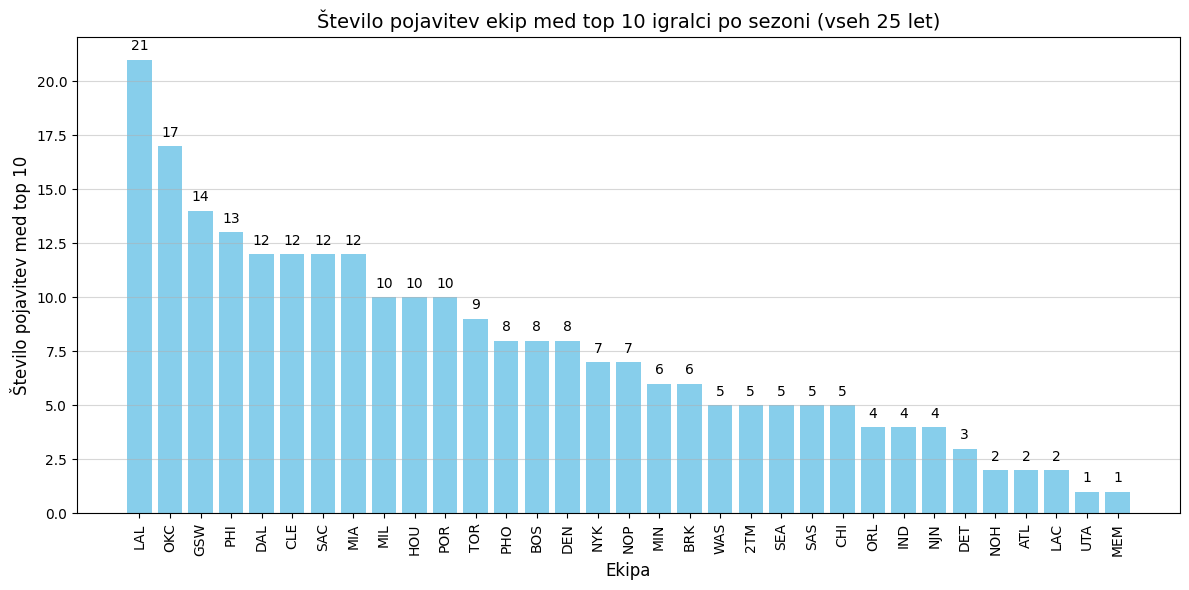

In [ ]:
top10_po_letih = (
    tabela_podatkov.sort_values(by=["Leto", "PTS"], ascending=[True, False])
        .groupby("Leto")
        .head(10)
)

št_ekip = top10_po_letih["Ekipa"].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(št_ekip.index, št_ekip.values, color="skyblue")
plt.title("Število pojavitev ekip med top 10 igralci po sezoni (vseh 25 let)", fontsize=14)
plt.xlabel("Ekipa", fontsize=12)
plt.ylabel("Število pojavitev med top 10", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", alpha=0.5)

for bar in bars:     #dodaj številke na vrh stolpcev
    yval= bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.3, int(yval), ha="center", va="bottom")

plt.tight_layout()
plt.show()

### 5.3. Pozicije

Poz
SG    68
SF    54
PG    53
PF    49
C     26
Name: count, dtype: int64


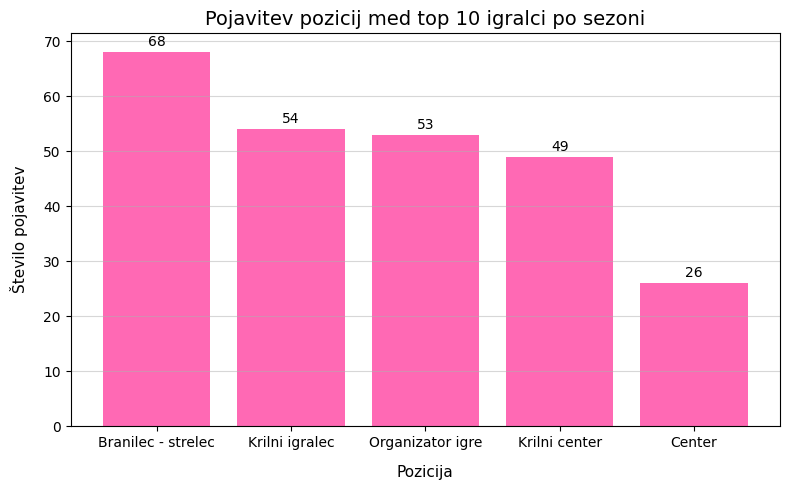

In [ ]:
top10_pozicije = (
    tabela_podatkov.sort_values(by=["Leto", "PTS"], ascending=[True, False])
    .groupby("Leto")
    .head(10)
)

št_pozicij = top10_pozicije["Poz"].value_counts()

prevodi= {
    "PG": "Organizator igre",
    "SG": "Branilec - strelec",
    "SF": "Krilni igralec",
    "PF": "Krilni center",
    "C": "Center"
}

št_pozicij.index = št_pozicij.index.map(lambda x: prevodi.get(x))

plt.figure(figsize=(8, 5))
bars = plt.bar(št_pozicij.index, št_pozicij.values, color="hotpink")
plt.title("Pojavitev pozicij med top 10 igralci po sezoni", fontsize=14)
plt.xlabel("Pozicija", fontsize=11, labelpad=11)
plt.ylabel("Število pojavitev", fontsize=11, labelpad=11)
plt.grid(axis="y", alpha=0.5)


for bar in bars:
    yval= bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha="center", va="bottom")

plt.tight_layout()
plt.show()

### Ugotovitve 

Pri tej analizi sem želela ugotoviti kateri so top 10 igralci z največjim številom točk v vseh sezonah in koliko točk so dosegli. Zanimalo me je tudi število pojavitev ekip in pozicij top 10 igralcev vsako sezono. Ugotovila sem, da med najboljšimi strelci prevladuje James Harden, sledi mu Kobe Bryant. Med top 10 igralcev vsako sezono pa močno prevladuje ekipa Dallas, pri pozicijah pa Branilec - strelec. Zato je zanimivo, da je večina igralcev z največjim številom točk v vseh sezonah v vlogi organizatorja igre in ne branilec_strelec.

## 6. Zaključek

Moje glavno področje preučevanje v analiza je bilo deset najboljših igralcev.  